In [2]:
# 1. Recopilación y y carga de datos

import pandas as pd
df = pd.read_csv('train.csv')

display(df.head())
display(df.info())


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

None

In [7]:
# 2. Análisis descriptivo

df.describe()
product_freq = df['Product ID'].value_counts()
display(product_freq)


Product ID
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
TEC-AC-10002049    15
TEC-AC-10003628    15
                   ..
OFF-PA-10000919     1
TEC-MA-10003353     1
OFF-LA-10003388     1
OFF-EN-10004206     1
TEC-PH-10002645     1
Name: count, Length: 1861, dtype: int64

Text(0, 0.5, 'Ventas')

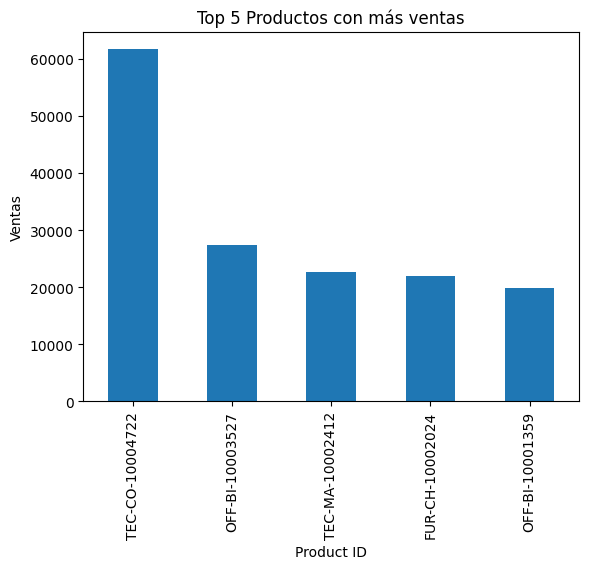

In [14]:
# 3. Visualización de datos

import matplotlib.pyplot as plt
import seaborn as sns

top_5_stores = df.groupby('Product ID')['Sales'].sum().nlargest(5)
top_5_stores.plot(kind='bar', title = 'Top 5 Productos con más ventas')
plt.ylabel('Ventas')

Text(0, 0.5, 'Frecuencia')

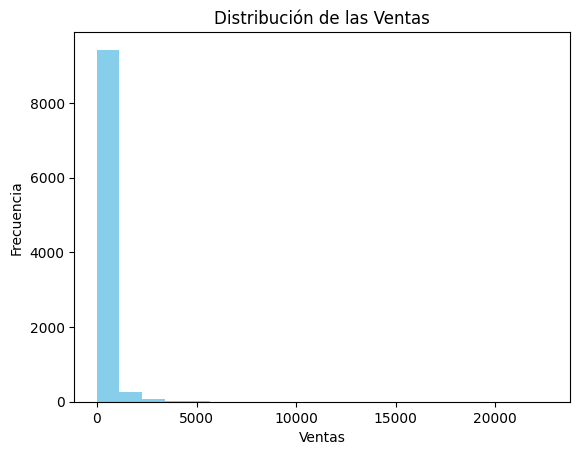

In [48]:
plt.hist(df['Sales'], bins=20, color='skyblue') 
plt.title('Distribución de las Ventas') 
plt.xlabel('Ventas') 
plt.ylabel('Frecuencia')

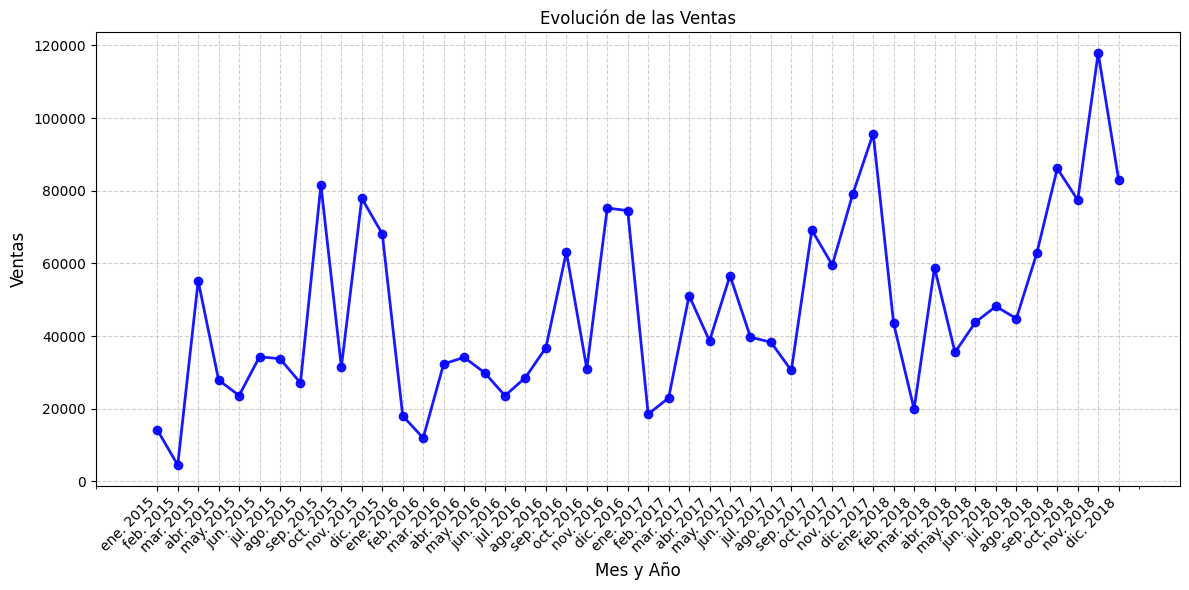

In [60]:
# 4. Identificación de patrones

# Diagrama de dispersión para analizar la relación
# entre cantidad vendida y la edad del cliente
df['Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y').dt.to_period('M')
sales_ts = df.groupby('Date')['Sales'].sum()


import matplotlib.dates as mdates

# Graficar la evolución de ventas con mayor espaciado entre meses
sales_ts.plot(
    title='Evolución de las Ventas', 
    figsize=(12, 6),  # Aumentar el tamaño de la figura para dar más espacio
    color='blue',  
    linestyle='-',  
    marker='o',  
    markersize=6,  
    linewidth=2,  
    alpha=0.9  
)

# Ajustar el límite de los márgenes del gráfico
plt.xlim(sales_ts.index.min().to_timestamp() - pd.DateOffset(months=3), 
         sales_ts.index.max().to_timestamp() + pd.DateOffset(months=3))

# Establecer el formato del eje X para que se muestren menos etiquetas de meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Mostrar etiquetas cada 3 meses

# Formato de los meses y años más claro
plt.xticks(
    sales_ts.index.to_timestamp(),  
    sales_ts.index.strftime('%b %Y'),  
    rotation=45,  
    ha='right'  
)

# Estética extra para identificar mejor mes y año
plt.grid(True, linestyle='--', alpha=0.6)  
plt.xlabel('Mes y Año', fontsize=12)  
plt.ylabel('Ventas', fontsize=12)  

plt.tight_layout()  
plt.show()

